## Demo of animation capability of IPython Notebook

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import HTML, display

### Interactive widgets: Varying step size for ODE algorithms

<IPython.core.display.Javascript object>


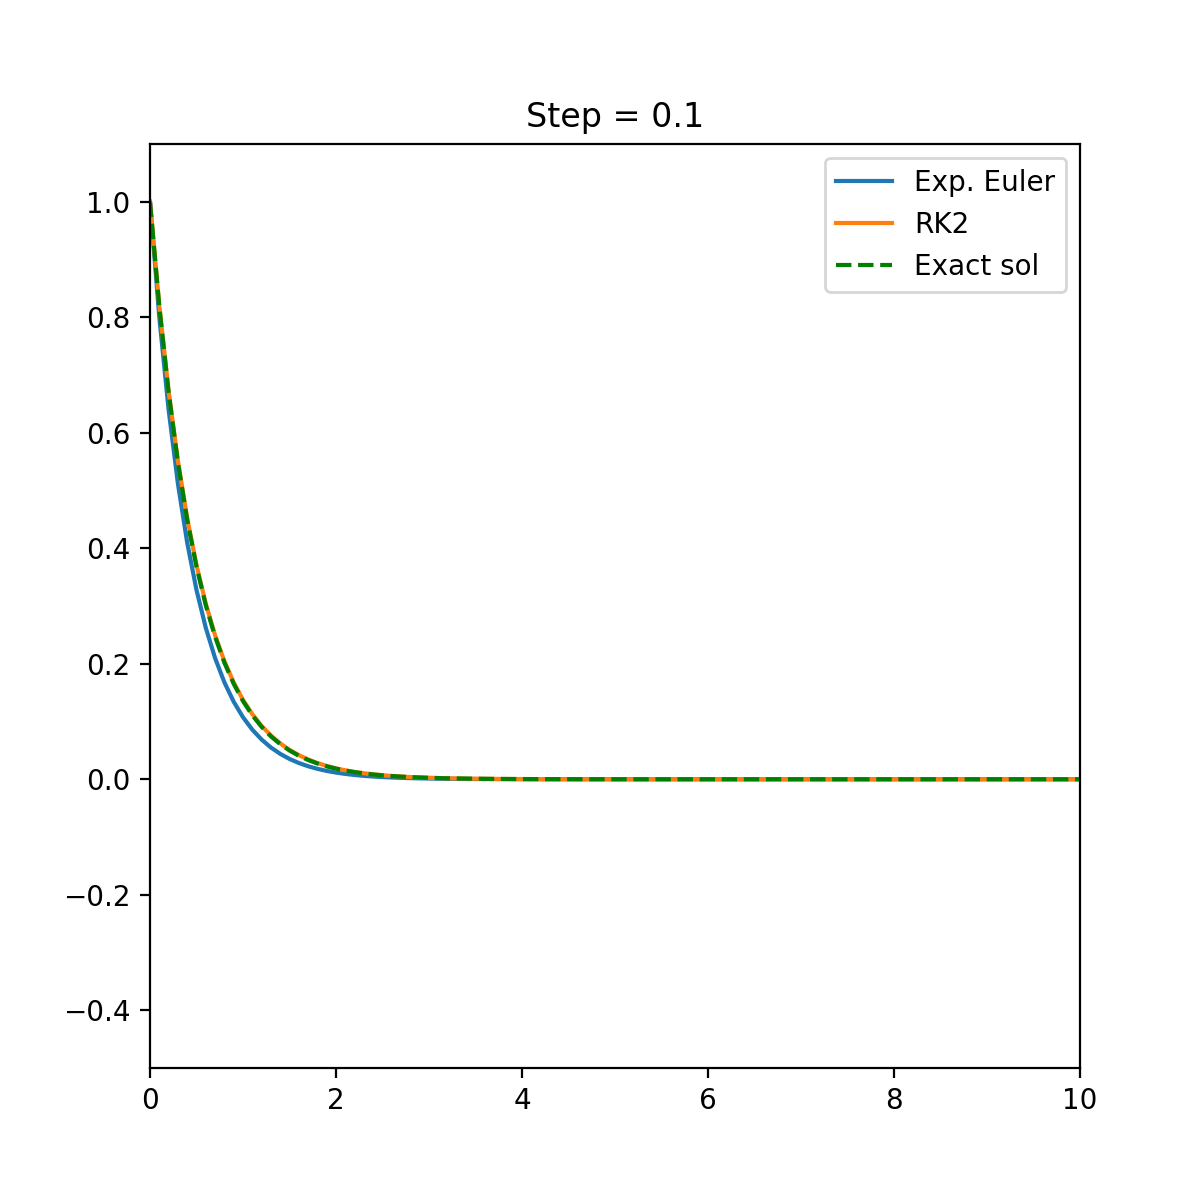

interactive(children=(FloatSlider(value=0.1, description='step', max=1.0, min=0.1), Output()), _dom_classes=('…

In [8]:
fig, ax = plt.subplots(1, figsize=(6, 6))
T  = 10.
y0 = 1.0

func = lambda y, t: -2*y
fsol = lambda t: np.exp(-2*t)

def update_plot(step=0.1):
    N  = int(T/step)+1
    ts = np.linspace(0, T, N)
    y_ee = np.zeros((N,))
    y_ee[0] = y0
    y_rk = np.zeros((N,))
    y_rk[0] = y0

    for _i in range(1,N):
        _t = ts[_i-1]

        # Exp. Euler
        y_ee[_i] = y_ee[_i-1] + step * func(y_ee[_i-1], _t)

        # RK2
        _k1 = step * func(y_rk[_i-1], _t)
        _k2 = step * func(y_rk[_i-1]+0.5*_k1, _t+0.5*step)
        y_rk[_i] = y_rk[_i-1] + _k2

    ax.clear()
    ax.plot(ts, y_ee, label='Exp. Euler')
    ax.plot(ts, y_rk, label='RK2')
    ax.plot(ts, fsol(ts), 'g--', label='Exact sol')
    ax.set_title('Step = {0}'.format(step))
    ax.set_xlim(0, T)
    ax.set_ylim(-0.5, 1.1)
    ax.legend(loc=1)
    plt.show()

widgets.interactive(update_plot, step=(0.1,1,0.1))

### Animation: Travelling wave

In [6]:
L  = 1.0
T  = 4.0
dt = 0.01
c  = 0.5
Nx = 501
Nt = int(T/dt)+1
x  = np.linspace(0, L, Nx)
t  = np.linspace(0, T, Nt)
u  = np.zeros((Nt, Nx))

def func(x):
    _f = np.zeros_like(x)
    _m = (x >= 0.45) & (x < 0.5)
    _f[_m] = 20*(x[_m]-0.45)
    _m = (x >= 0.5) & (x < 0.55)
    _f[_m] = 20*(0.55-x[_m])
    return _f

def Func(x):
    _f = np.zeros((Nx,))
    _x = np.mod(x, 2)
    _m = _x <= 1
    _f[_m] = func(_x[_m])
    _f[~_m] = -func(np.abs(_x[~_m]-1))
    return _f

for _i in range(Nt):
    u[_i] = 0.5 * (Func(x-c*t[_i]) + Func(x+c*t[_i]))

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    line.set_data(x, u[i])
    time_text.set_text('t={0:3.2f}s'.format(i*dt))
    return line, time_text

<IPython.core.display.Javascript object>


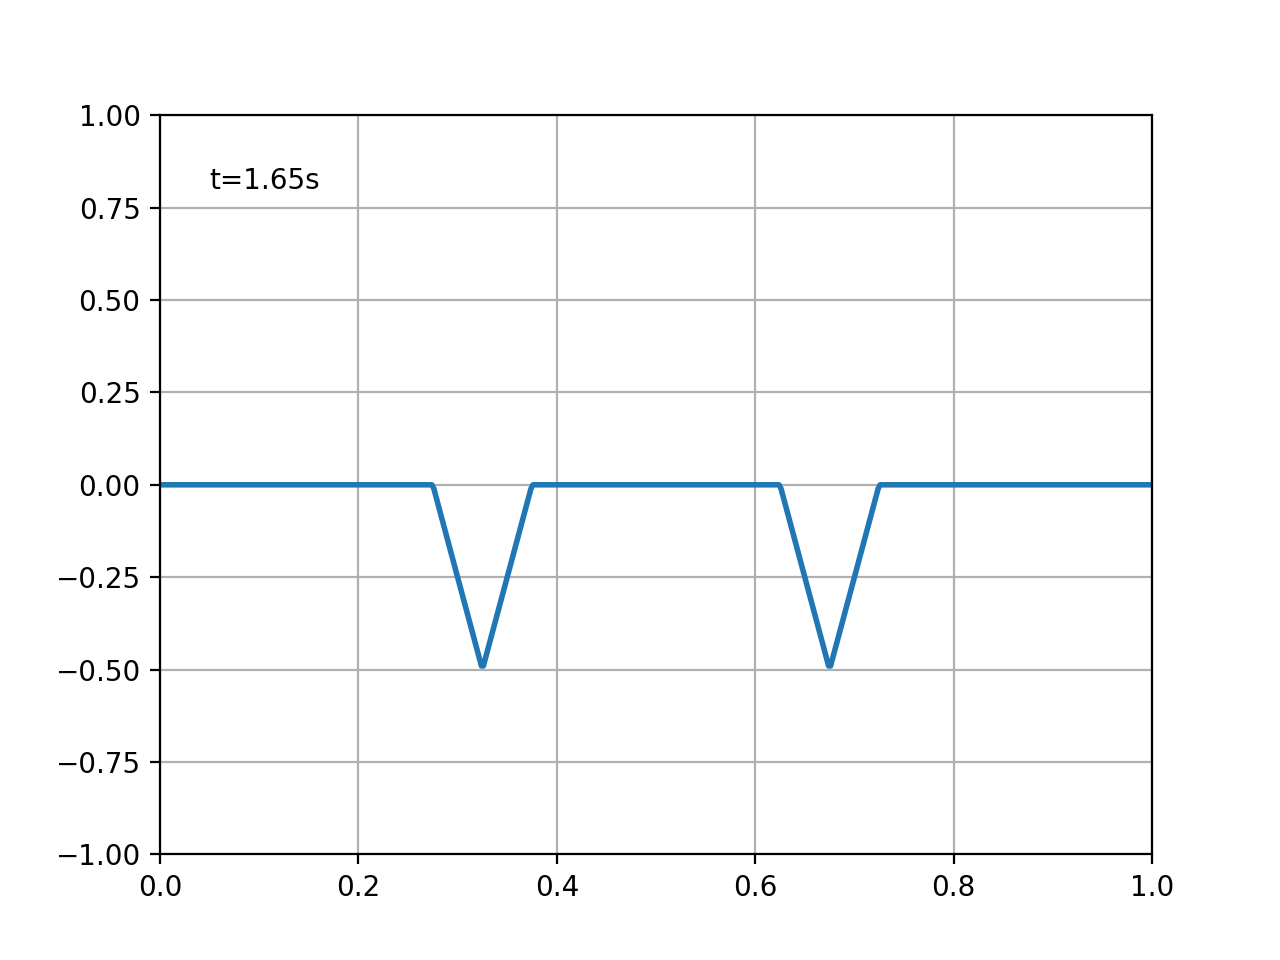

In [7]:
# Just animation

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 1), ylim=(-1.0, 1.0))
ax.grid()
line, = ax.plot([], [], '-', lw=2)
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

ani = animation.FuncAnimation(fig, animate, np.arange(0, Nt), interval=25, blit=True, init_func=init)

In [ ]:
# Interactive animation
HTML(ani.to_jshtml())